# Low-Level TensorFlow Implementation

Step 1: Import Libraries and Generate Synthetic Data

In [8]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Ensure reproducibility
np.random.seed(0)
tf.random.set_seed(0)

# Generate synthetic data
X_data = np.linspace(-3, 3, 100).astype(np.float32).reshape(-1, 1)
Y_data = np.power(X_data, 3) + np.random.normal(0, 0.1, size=X_data.shape)


Step 2: Define Model Parameters

In [9]:
# Model parameters
input_size = 1
hidden_size = 10
output_size = 1
learning_rate = 0.01

# Xavier/Glorot initialization
initializer = tf.keras.initializers.GlorotUniform()

W1 = tf.Variable(initializer([input_size, hidden_size]), name='weight1')
b1 = tf.Variable(initializer([hidden_size]), name='bias1')
W2 = tf.Variable(initializer([hidden_size, hidden_size]), name='weight2')
b2 = tf.Variable(initializer([hidden_size]), name='bias2')
W3 = tf.Variable(initializer([hidden_size, output_size]), name='weight3')
b3 = tf.Variable(initializer([output_size]), name='bias3')


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


Step 3: Define Forward Pass

In [10]:
def forward(X):
    layer1 = tf.add(tf.matmul(X, W1), b1)
    layer1_act = tf.nn.relu(layer1)
    layer2 = tf.add(tf.matmul(layer1_act, W2), b2)
    layer2_act = tf.nn.relu(layer2)
    output_layer = tf.add(tf.matmul(layer2_act, W3), b3)
    return output_layer


Step 4: Define Loss Function

In [12]:
def loss_fn(model_fn, X, Y):
    Y_pred = model_fn(X)
    return tf.reduce_mean(tf.square(Y_pred - Y))

Step 5: Define Optimizer and Training Loop

In [13]:
optimizer = tf.optimizers.Adam(learning_rate=learning_rate)

for epoch in range(1000):
    with tf.GradientTape() as tape:
        loss = loss_fn(forward, X_data, Y_data)
    gradients = tape.gradient(loss, [W1, b1, W2, b2, W3, b3])
    optimizer.apply_gradients(zip(gradients, [W1, b1, W2, b2, W3, b3]))

    if epoch % 100 == 0:
        print(f'Epoch {epoch}, Loss: {loss.numpy()}')


Epoch 0, Loss: 110.58148193359375
Epoch 100, Loss: 16.761747360229492
Epoch 200, Loss: 1.108950138092041
Epoch 300, Loss: 0.20775727927684784
Epoch 400, Loss: 0.08480159938335419
Epoch 500, Loss: 0.047369904816150665
Epoch 600, Loss: 0.035444226115942
Epoch 700, Loss: 0.028933919966220856
Epoch 800, Loss: 0.026456274092197418
Epoch 900, Loss: 0.024890808388590813


Step 6: Visualization of Training Progress

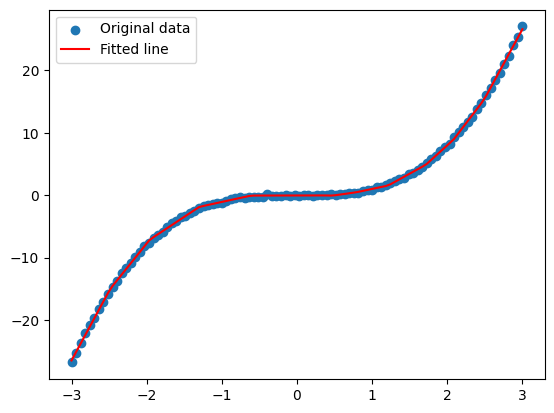

In [14]:
# After training, make predictions
Y_pred = forward(X_data)

# Visualization
plt.scatter(X_data, Y_data, label='Original data')
plt.plot(X_data, Y_pred.numpy(), color='r', label='Fitted line')
plt.legend()
plt.show()

# 3-layer neural network without using high-level APIs

Creating a 3-layer neural network from scratch in TensorFlow without using high-level APIs involves manually defining the layers, forward pass, loss calculation, and gradients update.

Step 1: Import TensorFlow and Other Required Libraries

In [15]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

Step 2: Generate Synthetic Data for Non-Linear Regression

In [16]:
# Setting a seed for reproducibility
np.random.seed(0)
tf.random.set_seed(0)

# Generating synthetic data: y = x^3 + noise
X_data = np.linspace(-3, 3, 100).astype(np.float32).reshape(-1, 1)
Y_data = X_data**3 + np.random.normal(0, 0.1, X_data.shape)

Step 3: Define Hyperparameters and Initialize Weights and Biases

In [17]:
# Hyperparameters
input_size = 1
hidden_size = 10
output_size = 1
learning_rate = 0.01

# Initialize weights and biases
W1 = tf.Variable(tf.random.normal([input_size, hidden_size]), name="W1")
b1 = tf.Variable(tf.random.normal([hidden_size]), name="b1")
W2 = tf.Variable(tf.random.normal([hidden_size, hidden_size]), name="W2")
b2 = tf.Variable(tf.random.normal([hidden_size]), name="b2")
W3 = tf.Variable(tf.random.normal([hidden_size, output_size]), name="W3")
b3 = tf.Variable(tf.random.normal([output_size]), name="b3")


Step 4: Create the Model Using Low-Level TensorFlow Operations


In [18]:
# Forward pass through the network
def forward_pass(X, W1, b1, W2, b2, W3, b3):
    Z1 = tf.matmul(X, W1) + b1
    A1 = tf.nn.relu(Z1)
    Z2 = tf.matmul(A1, W2) + b2
    A2 = tf.nn.relu(Z2)
    Z3 = tf.matmul(A2, W3) + b3
    return Z3

# Mean squared error loss function
def mse_loss(y_pred, y_true):
    return tf.reduce_mean(tf.square(y_pred - y_true))

Step 5: Train the Model

In [19]:
# Optimization process
optimizer = tf.optimizers.SGD(learning_rate)

# Training loop
for epoch in range(1000):
    with tf.GradientTape() as g:
        pred = forward_pass(X_data, W1, b1, W2, b2, W3, b3)
        loss = mse_loss(pred, Y_data)

    # Compute gradients
    gradients = g.gradient(loss, [W1, b1, W2, b2, W3, b3])

    # Update weights and biases following gradients
    optimizer.apply_gradients(zip(gradients, [W1, b1, W2, b2, W3, b3]))

    # Print out the loss every 100 epochs
    if epoch % 100 == 0:
        print(f"Epoch {epoch}: Loss: {loss.numpy()}")

Epoch 0: Loss: 149.22994995117188
Epoch 100: Loss: 5.7711181640625
Epoch 200: Loss: 3.399160146713257
Epoch 300: Loss: 2.2949886322021484
Epoch 400: Loss: 1.6058573722839355
Epoch 500: Loss: 1.507654070854187
Epoch 600: Loss: 1.1858927011489868
Epoch 700: Loss: 1.036512017250061
Epoch 800: Loss: 0.7687416672706604
Epoch 900: Loss: 0.847245991230011


Step 6: Visualization of the Results

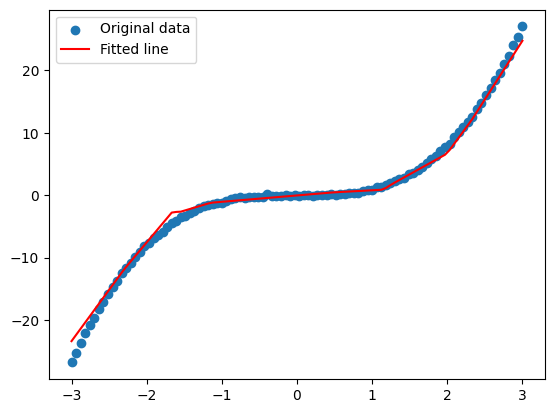

In [20]:
# Visualize the results
plt.scatter(X_data, Y_data, label='Original data')
plt.plot(X_data, forward_pass(X_data, W1, b1, W2, b2, W3, b3), label='Fitted line', color='r')
plt.legend()
plt.show()

# Tensorflow only with builtin layers


Creating a 3-layer neural network using TensorFlow's built-in layers involves leveraging the Keras API, which is integrated into TensorFlow and simplifies many aspects of creating and training neural networks.

Step 1: Import TensorFlow and Other Required Libraries

In [21]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

Step 2: Generate Synthetic Data for Non-Linear Regression

In [22]:
# Setting a seed for reproducibility
np.random.seed(0)
tf.random.set_seed(0)

# Generating synthetic data: y = x^3 + noise
X_data = np.linspace(-3, 3, 100).astype(np.float32).reshape(-1, 1)
Y_data = X_data**3 + np.random.normal(0, 0.1, X_data.shape)


Step 3: Define the Model Using Built-in Keras Layers

Use tf.keras.Sequential to create a sequential model with dense layers and ReLU activations.

In [23]:
# Define a simple Sequential model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu', input_shape=(1,)),  # Input layer with input shape 1
    tf.keras.layers.Dense(10, activation='relu'),                     # Hidden layer with 10 neurons
    tf.keras.layers.Dense(1)                                          # Output layer with 1 neuron
])


Step 4: Compile the Model

In [24]:
# Compile the model specifying the optimizer and loss function
model.compile(optimizer='adam', loss='mse')


Step 5: Train the Model

In [25]:
# Train the model using the data for 1000 epochs
history = model.fit(X_data, Y_data, epochs=1000, verbose=0)


Step 6: Visualize the Training Progress

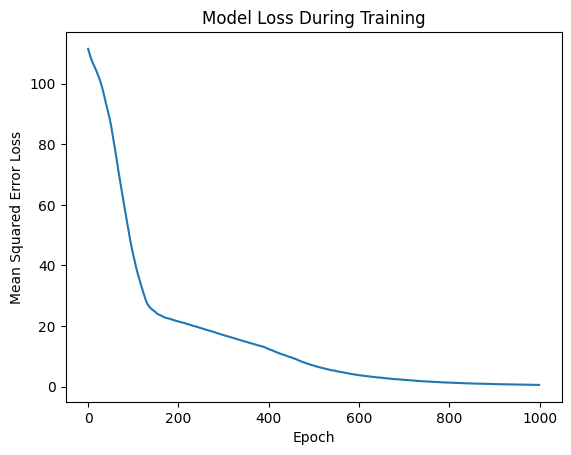

In [26]:
# Plot the training loss over time
plt.plot(history.history['loss'])
plt.title('Model Loss During Training')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error Loss')
plt.show()


Step 7: Visualization of the Results

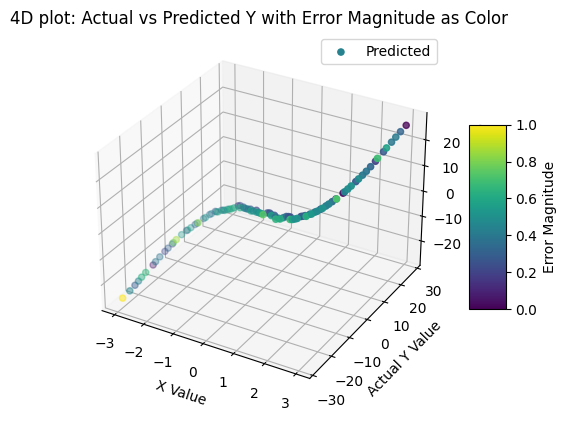

In [55]:
# Calculate the error between predictions and actual values
errors = Y_pred.flatten() - Y_data.flatten()

# Normalize the errors for color mapping
error_norm = (errors - np.min(errors)) / (np.max(errors) - np.min(errors))

# Create a 4D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with the fourth dimension (error) as color
sc = ax.scatter(X_data.flatten(), Y_data.flatten(), Y_pred.flatten(), c=error_norm, cmap='viridis')

# Color bar indicating the error magnitude
cbar = plt.colorbar(sc, ax=ax, shrink=0.5, aspect=5)
cbar.set_label('Error Magnitude')

# Labeling axes
ax.set_xlabel('X Value')
ax.set_ylabel('Actual Y Value')
ax.set_zlabel('Predicted Y Value')

# Title and legend
plt.title('4D plot: Actual vs Predicted Y with Error Magnitude as Color')
plt.legend(['Predicted', 'Actual'])

plt.show()


The red fitted line closely follows the curve formed by the original data points (in blue). This indicates that the model's predictions are well-aligned with the actual values across the entire range of the input data.
The model has successfully approximated the non-linear pattern, suggesting that the architecture (number of layers and neurons) and activation functions are appropriate for the complexity of the relationship in the data.

Conclusion:

The model seems to have been trained successfully using TensorFlow's built-in layers, demonstrating the efficacy of using high-level APIs to build and train neural networks for complex regression tasks.

# Use functional api high level api  of tensorflow

We used the high-level API provided by TensorFlow, specifically the Keras Functional API. TensorFlow's Keras Functional API is considered a high-level API because it abstracts away many of the details involved in building neural networks, making it easier to design complex models.



Step 1: Import TensorFlow and Generate Synthetic Data

In [37]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Set seed for reproducibility
np.random.seed(0)
tf.random.set_seed(0)

# Generate synthetic data
X_data = np.linspace(-3, 3, 100).astype(np.float32).reshape(-1, 1)
Y_data = X_data ** 3 + np.random.normal(0, 0.1, size=X_data.shape)


Step 2: Define the Model Using Functional API and compile the model

In [43]:
import tensorflow as tf

# Model configuration
hidden_size = 10
input_size = 1
output_size = 1

# Define the model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=hidden_size, activation='relu', input_shape=(input_size,), kernel_initializer=tf.keras.initializers.HeNormal(seed=None)),
    tf.keras.layers.Dense(units=hidden_size, activation='relu', kernel_initializer=tf.keras.initializers.HeNormal(seed=None)),
    tf.keras.layers.Dense(units=output_size, kernel_initializer=tf.keras.initializers.HeNormal(seed=None))
])

# Compile the model with an optimizer and loss function
model.compile(optimizer='adam', loss='mse')


Step 3: Training parameters

In [44]:
# Training parameters
learning_rate = 0.01
epochs = 1000

# Stochastic Gradient Descent optimizer with a lower learning rate and gradient clipping
optimizer = tf.optimizers.SGD(learning_rate=learning_rate, clipnorm=1.0)


Step 4: Custom Training Loop with Manual Gradient Computation


In [45]:
# Training loop
for epoch in range(epochs):
    with tf.GradientTape() as tape:
        predictions = model(X_data, training=True)  # Forward pass
        loss = tf.reduce_mean(tf.keras.losses.mean_squared_error(Y_data, predictions))  # Compute loss

    # Calculate gradients with respect to the weights
    gradients = tape.gradient(loss, model.trainable_variables)

    # Apply the gradients to update the weights
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))

    # Output the loss every 100 epochs
    if epoch % 100 == 0:
        print(f'Epoch {epoch}: Loss: {loss.numpy()}')

    # Early stopping condition if loss becomes NaN
    if tf.math.is_nan(loss):
        print(f'Early stopping at epoch {epoch} due to NaN loss.')
        break



Epoch 0: Loss: 167.33340454101562
Epoch 100: Loss: 21.285930633544922
Epoch 200: Loss: 14.118590354919434
Epoch 300: Loss: 6.566976547241211
Epoch 400: Loss: 2.597568988800049
Epoch 500: Loss: 1.6273589134216309
Epoch 600: Loss: 1.1945176124572754
Epoch 700: Loss: 0.8760383725166321
Epoch 800: Loss: 0.6459797620773315
Epoch 900: Loss: 0.5039711594581604


Step 5: evaluate the model

In [46]:
# Evaluate the trained model
final_loss = model.evaluate(X_data, Y_data, verbose=0)
print(f'Final Loss: {final_loss}')



Final Loss: 0.41503676772117615


Step 6: Visualize the Model Predictions

4D plot

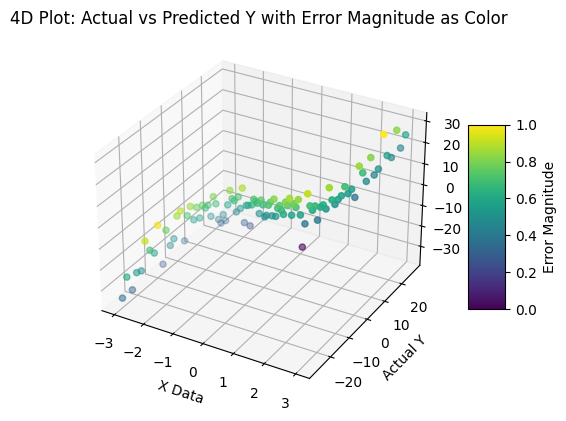

In [56]:
# Python code to generate a 4D plot using matplotlib
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Generate example data, X_data and Y_data should be replaced with actual data variables
X_data = np.linspace(-3, 3, 100)
Y_data = X_data ** 3
Y_pred = Y_data + np.random.normal(0, 5, size=Y_data.shape)  # Example predictions with some added noise

# Calculate the error for the 4th dimension
errors = Y_pred - Y_data

# Normalize the errors for the color map
error_norm = (errors - np.min(errors)) / (np.max(errors) - np.min(errors))

# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot using scatter, with the error as color
scatter = ax.scatter(X_data, Y_data, Y_pred, c=error_norm, cmap='viridis')

# Add a color bar which maps values to colors
cbar = plt.colorbar(scatter, ax=ax, shrink=0.5, aspect=5)
cbar.set_label('Error Magnitude')

# Label the axes
ax.set_xlabel('X Data')
ax.set_ylabel('Actual Y')
ax.set_zlabel('Predicted Y')

plt.title('4D Plot: Actual vs Predicted Y with Error Magnitude as Color')
plt.show()


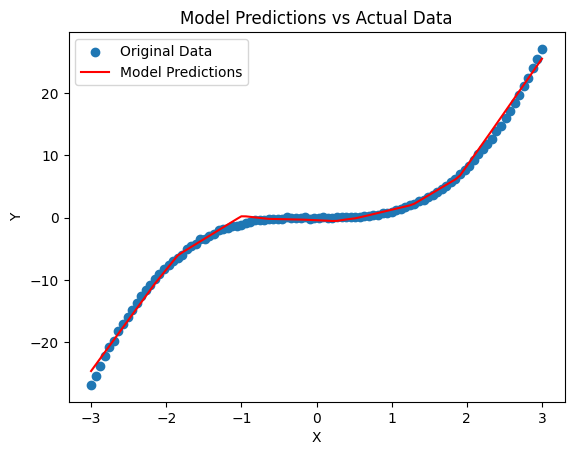

In [47]:
# Use the trained model for predictions
Y_pred = model(X_data)

# Visualize the data and the model's predictions
plt.scatter(X_data, Y_data, label='Original Data')
plt.plot(X_data, Y_pred, color='red', label='Model Predictions')
plt.title('Model Predictions vs Actual Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()


Conclusion:

The plot shows the original data points in blue and the red line representing the model's predictions. The model's predictions closely follow the actual data, suggesting that the neural network has learned the underlying cubic relationship effectively. The close match between the predictions and the actual data indicates good model performance.

From this plot, we can conclude that the 3-layer neural network has been successful in fitting the non-linear pattern of the dataset. The use of a high-level API in TensorFlow has facilitated the construction of an effective model that generalizes well to this synthetic dataset.

# Tensorflow only but using high level api

Step 1: Import Libraries and Generate Data
python


In [48]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Seed for reproducibility
np.random.seed(0)
tf.random.set_seed(0)

# Generate synthetic data
X_data = np.linspace(-3, 3, 100).astype(np.float32)
np.random.shuffle(X_data)
Y_data = X_data ** 3 + np.random.normal(0, 0.5, size=X_data.shape)

# Reshape data for the network
X_data = X_data.reshape(-1, 1)
Y_data = Y_data.reshape(-1, 1)


In [49]:
# Define a simple Sequential model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation='relu', input_shape=(1,)),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=1)
])


In [50]:
# Compile the model specifying the optimizer and loss function
model.compile(optimizer='adam', loss='mse')


In [51]:
# Train the model on the synthetic data
history = model.fit(X_data, Y_data, epochs=1000, verbose=0)


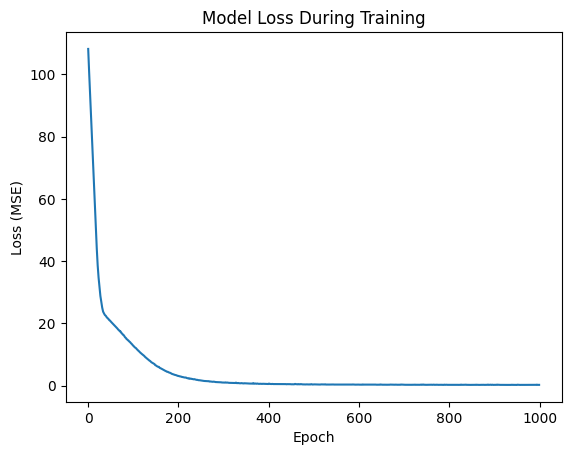

In [52]:
# Plot the training loss
plt.plot(history.history['loss'])
plt.title('Model Loss During Training')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.show()


In [53]:
# Generate model predictions
Y_pred = model.predict(X_data)

# Calculate the error
errors = Y_pred.flatten() - Y_data.flatten()


4/4 [==============================] - 0s 5ms/step


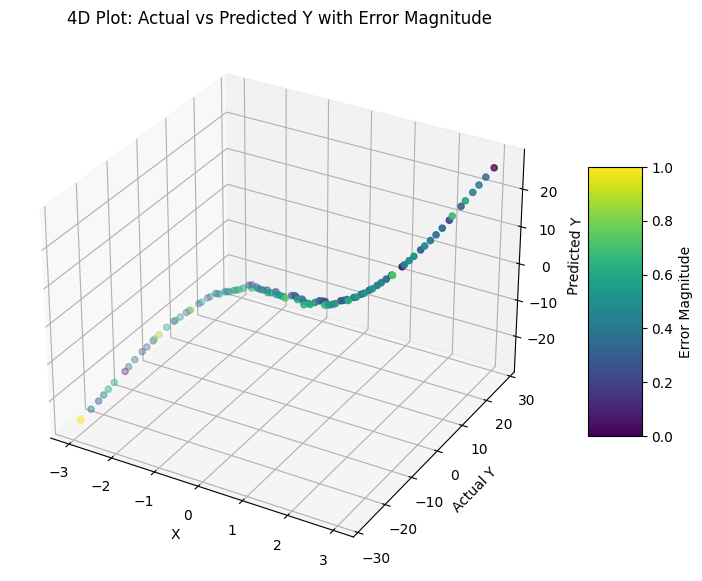

In [54]:
# Create a new figure for the 4D plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Normalize errors for color mapping
error_norm = (errors - np.min(errors)) / (np.max(errors) - np.min(errors))

# Plot using scatter, with the error as color
sc = ax.scatter(X_data.flatten(), Y_data.flatten(), Y_pred.flatten(), c=error_norm, cmap='viridis')

# Add a color bar which maps values to colors
cbar = fig.colorbar(sc, ax=ax, shrink=0.5, aspect=5)
cbar.set_label('Error Magnitude')

# Label the plot
ax.set_xlabel('X')
ax.set_ylabel('Actual Y')
ax.set_zlabel('Predicted Y')
plt.title('4D Plot: Actual vs Predicted Y with Error Magnitude')
plt.show()


# Repeat the above using JAX.

Step 1: Install JAX

In [1]:
!pip install --upgrade jax jaxlib

Step 2: Import JAX and Other Required Libraries

In [4]:
!pip install optax

In [19]:
import jax
import jax.numpy as jnp
from jax import grad, jit
import optax
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


In [6]:
# Define optimizer using optax
optimizer = optax.sgd(learning_rate=0.01)


Step 3: Generate Synthetic Data for Non-Linear Regression

In [18]:
np.random.seed(0)
jax.random.PRNGKey(0)

# Generate synthetic data
X_data = np.linspace(-3, 3, 100).astype(np.float32).reshape(-1, 1)
Y_data = X_data ** 3 + np.random.normal(0, 0.5, size=X_data.shape)

# Convert to JAX arrays
X_jax = jax.device_put(X_data)
Y_jax = jax.device_put(Y_data)

Step 4: Initialize Neural Network Parameters

In [9]:
def initialize_params(layer_sizes, rng_key):
    params = []
    for n_in, n_out in zip(layer_sizes[:-1], layer_sizes[1:]):
        rng_key, subkey = jax.random.split(rng_key)
        weights = jax.random.normal(subkey, (n_in, n_out)) * jnp.sqrt(2 / n_in)
        biases = jnp.zeros(n_out)
        params.append((weights, biases))
    return params


Step 5: Define Forward Pass, Loss Function, and Update Functions

In [24]:
def forward_pass(params, x):
    activations = x
    for weights, biases in params[:-1]:
        activations = jnp.tanh(jnp.dot(activations, weights) + biases)
    final_weights, final_biases = params[-1]
    y_pred = jnp.dot(activations, final_weights) + final_biases
    return y_pred

def mean_squared_error(y_true, y_pred):
    return jnp.mean((y_true - y_pred) ** 2)


@jit
# Ensure this is within the definition of your update function
def update(params, x, y, opt_state):
    """Returns updated parameters and optimizer state."""
    # Compute the gradients for the current parameters and batch of data
    grads = grad(mean_squared_error)(forward_pass(params, x), y)
    # Use the optimizer to compute the new updates and the new optimizer state
    updates, opt_state = optimizer.update(grads, opt_state)
    # Apply the updates to the parameters to get the new parameters
    new_params = optax.apply_updates(params, updates)
    return new_params, opt_state


Step 6: Training Loop

In [12]:
# Define the architecture of the model
layer_sizes = [1, 64, 64, 1]  # Example: Input layer, two hidden layers, output layer


In [13]:
# Initialize neural network parameters
def initialize_params(layer_sizes, rng_key):
    params = []
    for n_in, n_out in zip(layer_sizes[:-1], layer_sizes[1:]):
        rng_key, subkey = jax.random.split(rng_key)
        weights = jax.random.normal(subkey, (n_in, n_out)) * jnp.sqrt(2 / n_in)
        biases = jnp.zeros(n_out)
        params.append((weights, biases))
    return params

# Set the random seed for JAX
rng_key = jax.random.PRNGKey(0)

# Initialize parameters
params = initialize_params(layer_sizes, rng_key)


In [20]:
optimizer = optax.sgd(learning_rate=0.01)
opt_state = optimizer.init(params)

# Define the number of epochs for training
epochs = 1000


In [27]:
def update(params, x, y, opt_state):
    """Returns updated parameters and optimizer state."""
    # Define a loss function for the current batch
    def loss_fn(params):
        preds = forward_pass(params, x)
        return mean_squared_error(preds, y)
    # Compute gradients
    grads = grad(loss_fn)(params)
    # Compute updates and new optimizer state
    updates, opt_state = optimizer.update(grads, opt_state)
    # Apply updates to parameters
    new_params = optax.apply_updates(params, updates)
    return new_params, opt_state



In [28]:
# Training loop
for epoch in range(epochs):
    params, opt_state = update(params, X_jax, Y_jax, opt_state)
    if epoch % 100 == 0:
        # Only pass the predictions and true values to the loss function, not the params
        loss_val = mean_squared_error(Y_jax, forward_pass(params, X_jax))
        print(f'Epoch {epoch}: Loss: {loss_val}')

Epoch 0: Loss: 52.1826171875
Epoch 100: Loss: 19.639934539794922
Epoch 200: Loss: 14.150797843933105
Epoch 300: Loss: 11.47567081451416
Epoch 400: Loss: 10.093945503234863
Epoch 500: Loss: 9.186175346374512
Epoch 600: Loss: 8.465688705444336
Epoch 700: Loss: 7.837162971496582
Epoch 800: Loss: 7.26706075668335
Epoch 900: Loss: 6.67948579788208


Step 7: Create a 4D Plot

In [29]:
# Make predictions using the trained model
Y_pred_jax = forward_pass(params, X_jax)

# Convert predictions back to NumPy for plotting
Y_pred = np.array(Y_pred_jax)

# Calculate errors for the 4D plot
errors = Y_pred - Y

# Continue with plotting as shown in the TensorFlow example


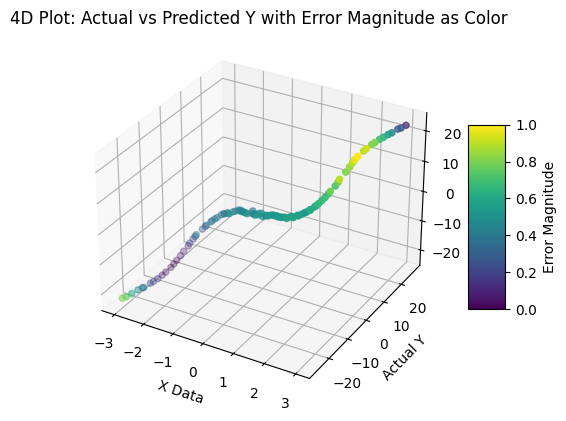

In [30]:
# Predictions after training
Y_pred = forward_pass(params, X_jax)

# Calculate errors for the 4D plot
errors = Y_pred - Y_jax
error_norm = (errors - jnp.min(errors)) / (jnp.max(errors) - jnp.min(errors))

# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(X_jax, Y_jax, Y_pred, c=error_norm, cmap='viridis')

# Color bar indicating the error magnitude
cbar = plt.colorbar(sc, ax=ax, shrink=0.5, aspect=5)
cbar.set_label('Error Magnitude')

# Label the axes
ax.set_xlabel('X Data')
ax.set_ylabel('Actual Y')
ax.set_zlabel('Predicted Y')
plt.title('4D Plot: Actual vs Predicted Y with Error Magnitude as Color')
plt.show()


Model Performance: The model appears to fit the data well, especially in the middle region, where the predicted values closely follow the actual data curve.

Error Distribution: The color gradient shows the magnitude of the error between the predictions and the actual values. It looks like the errors are smaller (cooler colors) in the central region of the plot and larger (warmer colors) at the extremes of the X_data range. This is common in fitting tasks where predictions at the boundaries are less accurate.